In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.15.0


In [3]:
# Fetch the MNIST data
(X_train, t_train), (X_test, t_test) = tf.keras.datasets.mnist.load_data()
print("Training data:", X_train.shape, t_train.shape)
print("Test data:", X_test.shape, t_test.shape)

# Normalize the values
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

# Mean removal
X_mean = np.mean(X_train, axis=0)
X_train -= X_mean
X_test -= X_mean

# One-hot encoding
T_train = tf.keras.utils.to_categorical(t_train, 10)
T_test = tf.keras.utils.to_categorical(t_test, 10)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [ ]:
# Delete all previous models to free memory
tf.keras.backend.clear_session()

# Sequential model
model = tf.keras.models.Sequential()

# Input layer representing the (28, 28) image
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

# Convolutional layer with 16 feature maps using 3x3 filters
model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='valid'))
model.add(tf.keras.layers.Activation('relu'))

# Max-pooling layerover 2x2 regions
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps into a vector
model.add(tf.keras.layers.Flatten())

# Fully-connected layer
model.add(tf.keras.layers.Dense(units=100))
model.add(tf.keras.layers.Activation('relu'))

# Softmax output layer over 10 classes
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax'))

# Learning rule
optimizer = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)

# Loss function
model.compile(
    loss='categorical_crossentropy', # loss function
    optimizer=optimizer, # learning rule
    metrics=['accuracy'] # show accuracy
)

print(model.summary())

In [ ]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

# Training procedure
model.fit(
    X_train, T_train, # training data
    batch_size=64,  # batch size
    epochs=10, # Maximum number of epochs
    validation_split=0.1, # Perceptage of training data used for validation
    callbacks=[history] # Track the metrics at the end of each epoch
)

Epoch 1/10
844/844 [==============================] - 12s 4ms/step - loss: 0.3173 - accuracy: 0.9058 - val_loss: 0.1071 - val_accuracy: 0.9703
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1005 - accuracy: 0.9699 - val_loss: 0.0716 - val_accuracy: 0.9798
Epoch 3/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0640 - accuracy: 0.9807 - val_loss: 0.0566 - val_accuracy: 0.9822
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0463 - accuracy: 0.9861 - val_loss: 0.0570 - val_accuracy: 0.9848
Epoch 5/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.0520 - val_accuracy: 0.9860
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0513 - val_accuracy: 0.9860
Epoch 7/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.0526 - val_accuracy: 0.9857
Epoch

In [ ]:
score = model.evaluate(X_test, T_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04487595334649086
Test accuracy: 0.9854999780654907


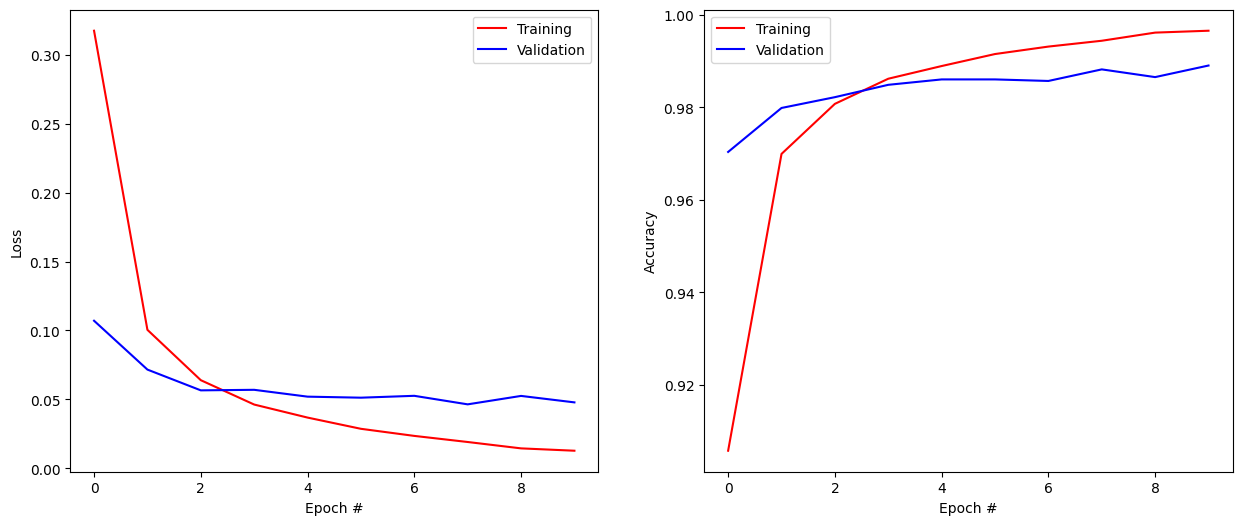

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
W = model.layers[0].get_weights()[0]

1


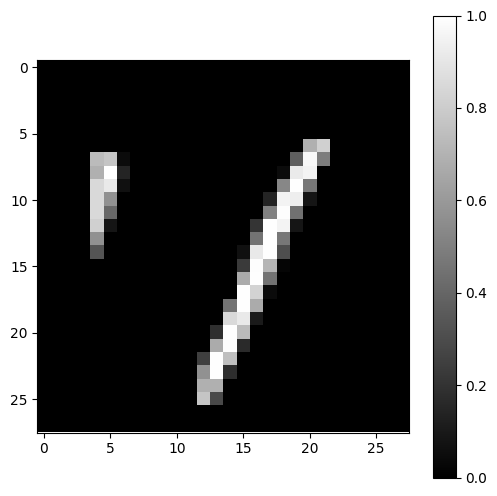

In [ ]:
idx = 31727 # or any other digit
x = X_train[idx, :, :, :].reshape(1, 28, 28, 1)
t = t_train[idx]

print(t)

plt.figure(figsize=(6, 6))
plt.imshow(x[0, :, :, 0] + X_mean[:, :, 0], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [ ]:
import tensorflow as tf

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[history])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5528 - accuracy: 0.4329 - val_loss: 1.3621 - val_accuracy: 0.5187
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1781 - accuracy: 0.5834 - val_loss: 1.1417 - val_accuracy: 0.5974
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0353 - accuracy: 0.6371 - val_loss: 1.0614 - val_accuracy: 0.6300
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9367 - accuracy: 0.6732 - val_loss: 0.9769 - val_accuracy: 0.6538
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8691 - accuracy: 0.6972 - val_loss: 0.9078 - val_accuracy: 0.6828
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8197 - accuracy: 0.7123 - val_loss: 0.8858 - val_accuracy: 0.6927
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7647 - accuracy: 0.7313 - val_loss: 0.8867 - val_accuracy

In [ ]:
# History tracks the evolution of the metrics during learning
history = tf.keras.callbacks.History()

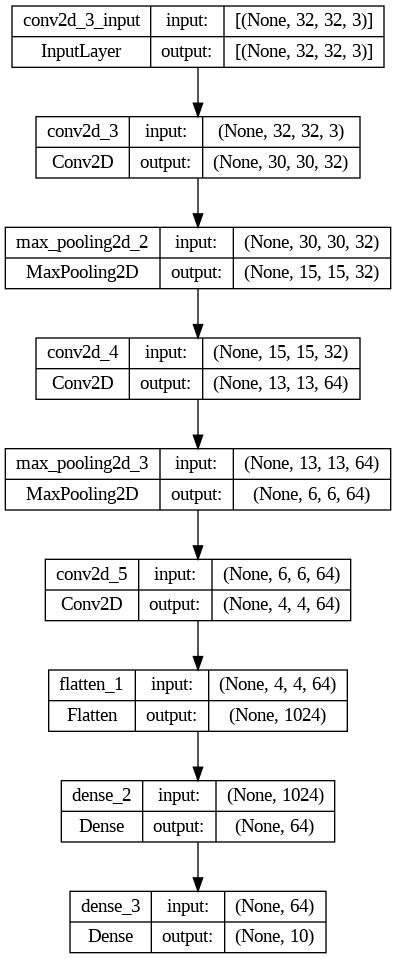

In [ ]:
# Visualize the model architecture
tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

1/1 [==============================] - 0s 60ms/step


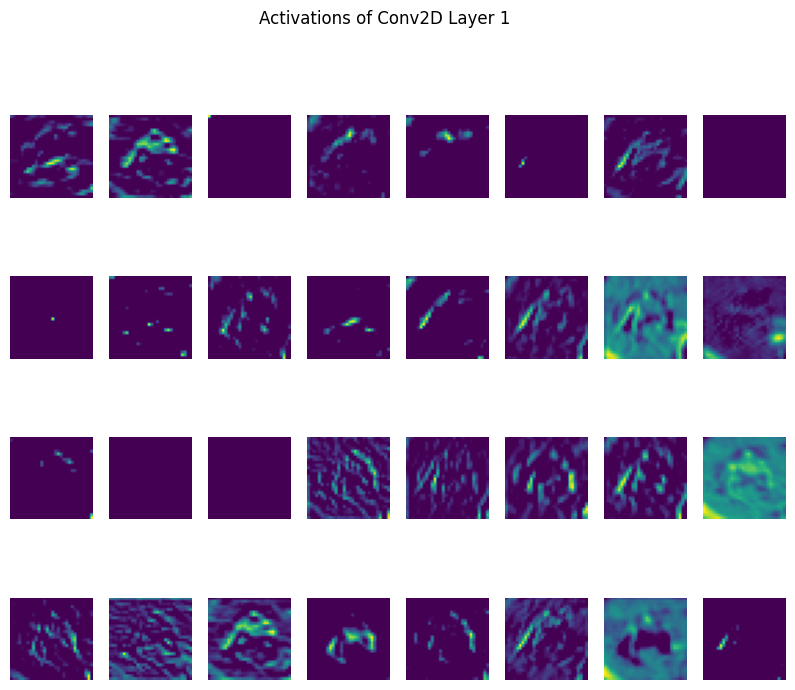

In [ ]:
# Visualize layer activations
sample_image = np.expand_dims(train_images[0], axis=0)  # Take the first image from the dataset

# Create models to retrieve layer activations
activations_model_1 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
activations_model_2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[2].output)
activations_model_3 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[4].output)

# Get layer activations
activations_1 = activations_model_1.predict(sample_image)
activations_2 = activations_model_2.predict(sample_image)
activations_3 = activations_model_3.predict(sample_image)

# Plot layer activations
plt.figure(figsize=(10, 8))
for i in range(32):  # Visualize the activations of the third convolutional layer
    plt.subplot(4, 8, i+1)
    plt.imshow(activations_1[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Activations of Conv2D Layer 1')
plt.show()

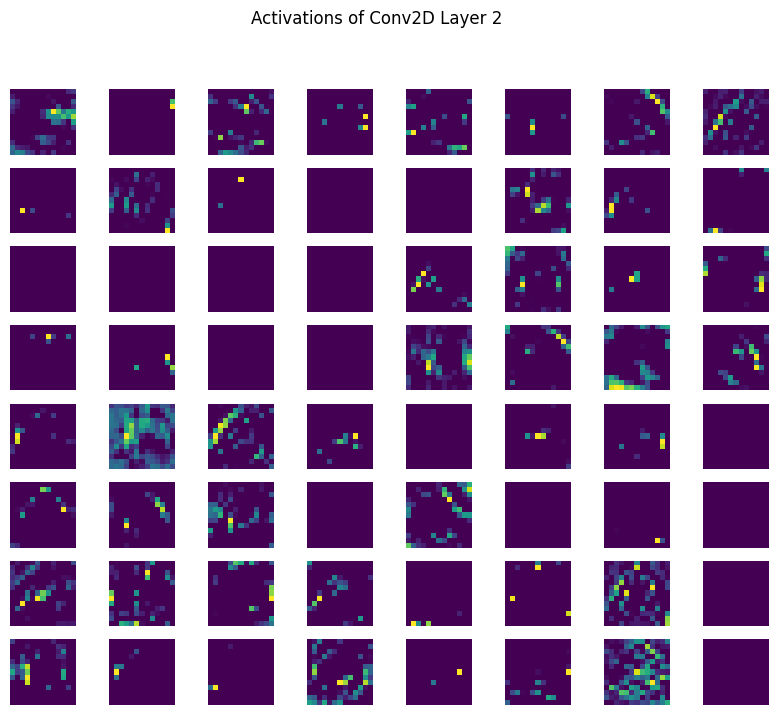

In [ ]:
# Activations of Conv2D Layer 2
plt.figure(figsize=(10, 8))
for i in range(64):  # Visualize the activations of the third convolutional layer
    plt.subplot(8, 8, i+1)
    plt.imshow(activations_2[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Activations of Conv2D Layer 2')
plt.show()

In [ ]:
# Activations of Conv2D Layer 3
plt.figure(figsize=(10, 8))
for i in range(64):  # Visualize the activations of the third convolutional layer
    plt.subplot(8, 8, i+1)
    plt.imshow(activations_3[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Activations of Conv2D Layer 3')
plt.show()

NameError: ignored